In [102]:
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
data = pd.read_csv('./parkinsons.data')

In [81]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(['name', 'status'], axis=1), data['status'], test_size=.2, random_state=7)

In [94]:
bst = XGBClassifier(n_estimators=100, max_depth=20, learning_rate=0.4, objective='binary:logistic')

bst.fit(X_train, y_train)

score_cv = cross_val_score(bst, X_train, y_train, cv=10)
preds = bst.predict(X_test)
print(f"Точность модели: {accuracy_score(y_test, preds):.3f}")
print(f"Средняя точность модели по кросс валидации: {score_cv.mean():.3f}")

Точность модели: 0.974
Средняя точность модели по кросс валидации: 0.925


Text(0.5, 1.0, 'Матрица ошибок')

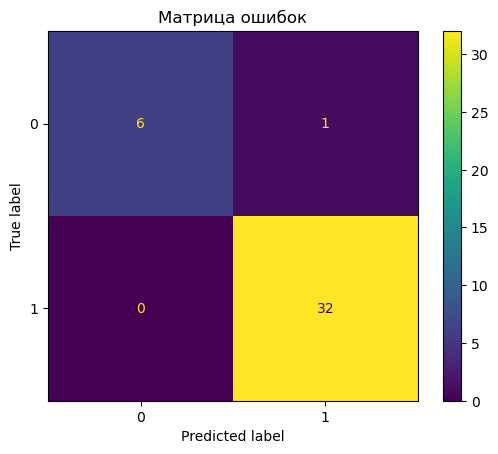

In [86]:
fig, ax = plt.subplots()
ConfusionMatrixDisplay.from_predictions(y_test, preds, ax=ax)
ax.set_title("Матрица ошибок")